In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# Load dataset
df = pd.read_csv("data/churn_dataset.csv")  # Use relative path

# Display info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df=df.iloc[:,1:]

In [3]:
df.duplicated().sum()

22

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
print(df["TotalCharges"].dtype)

float64


In [6]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
miss_column = df[df["TotalCharges"].isnull()]
print(miss_column)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

Nan values in TotalCharges column corresponds with 0 values at tenure it is because if there tenure is 0 there is no billing. So we change this Nan values with 0s.

In [8]:
df["TotalCharges"]=df["TotalCharges"].fillna(0)

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We handled null values.
##Detecting anomalies

In [10]:
for col in df.select_dtypes(include=['object']):
    print(col, df[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


It seems there is no anormally. For usefullnes we will convert boolean values to binary numeric values to use it in statistical calculations.

In [11]:
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


print(df[["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]].head())

   Partner  Dependents  PhoneService  PaperlessBilling  Churn
0        1           0             0                 1      0
1        0           0             1                 0      0
2        0           0             1                 1      1
3        0           0             0                 0      0
4        0           0             1                 1      1



We have cleaned the data. 
Cleaning Summary
Our dataset consisted of a total of 7043 rows and 21 columns .
Our data is found in clean form .
Our dataset looks a bit tidy with no NaNs nor duplicated values.
TotalCharges column has null values that need to be handled, it has 11 nulls, and we replaced them by zero After finding that tenure values equal to zero.
No columns needed to be dropped.


Preprocessing will continue with column manipulation

In [12]:
df = df.map(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


To change categorical variables into numerical values

In [13]:
df_dummies = pd.get_dummies(df).astype(float)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


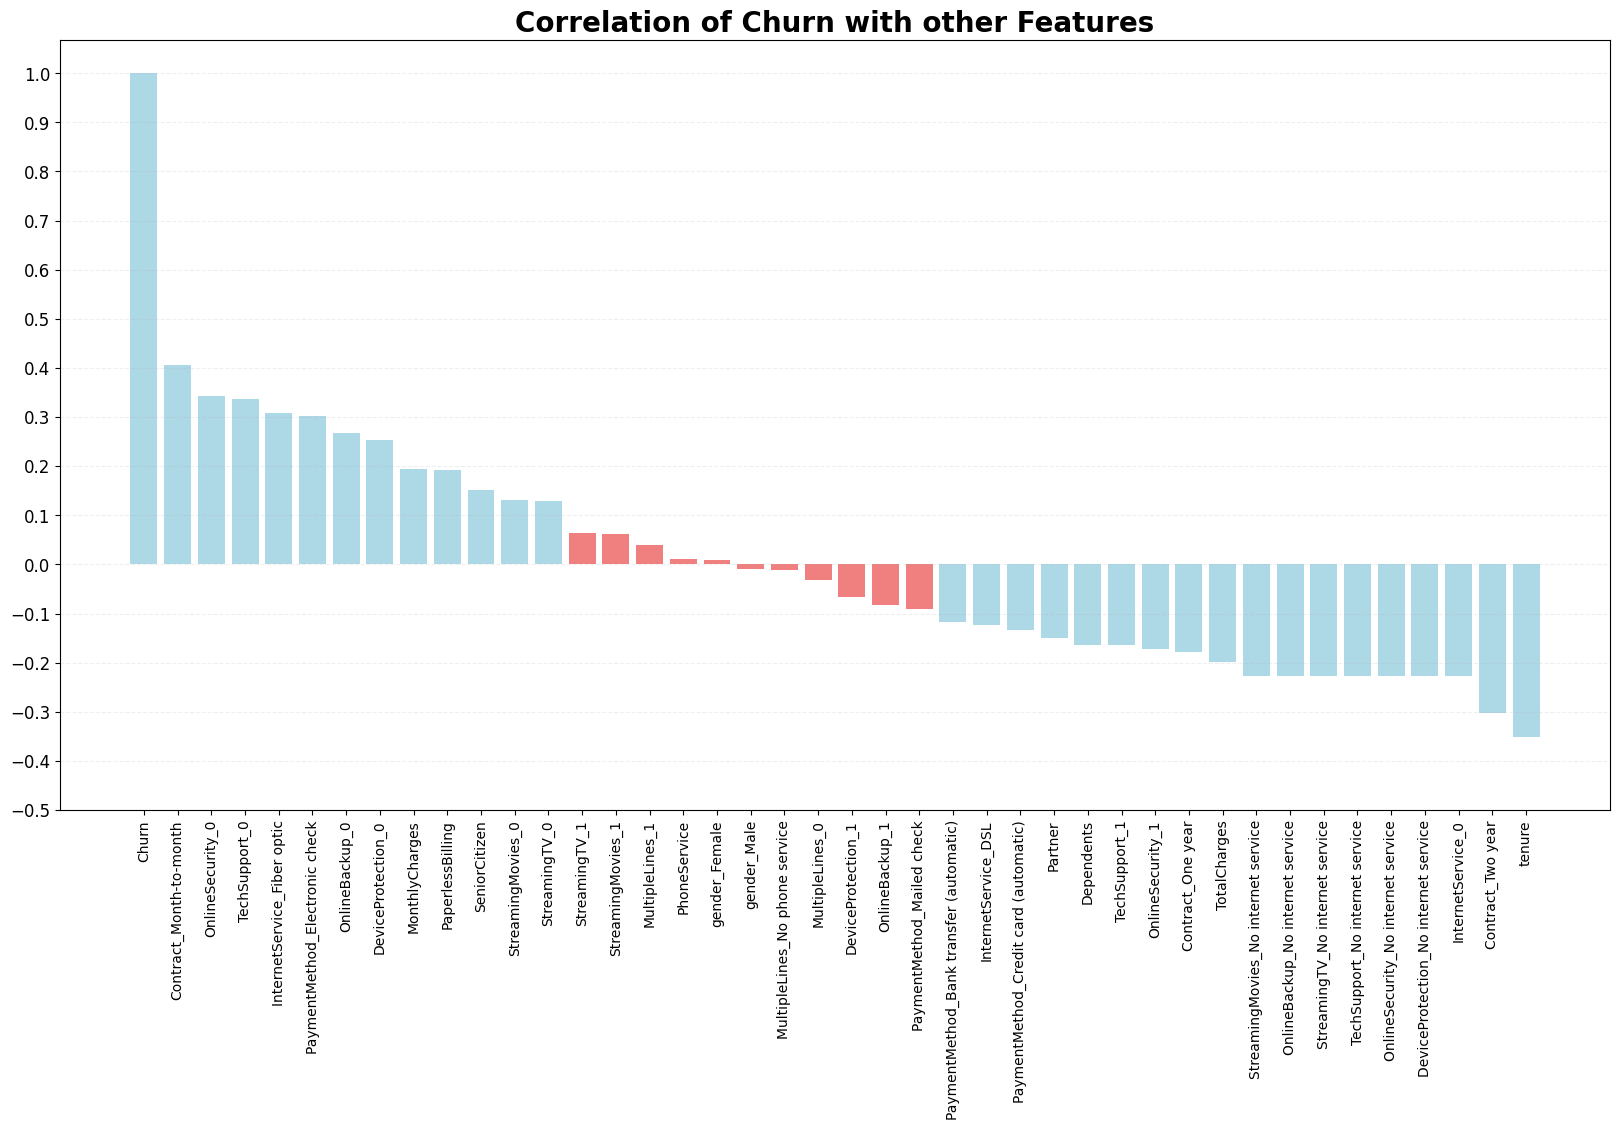

In [14]:

# Korelasyonları hesapla ve sırala
corr_values = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Renk belirleme: 0.1'in altındaki korelasyonlar kırmızı, diğerleri mavi
colors = ['lightcoral' if abs(corr) < 0.1 else 'lightblue' for corr in corr_values]

# Grafik oluşturma
plt.figure(figsize=(20, 10))
plt.title('Correlation of Churn with other Features', fontsize=20, weight='bold')

# Çubuk grafiği çiz
bars = plt.bar(corr_values.index, corr_values, color=colors)

# Grid çizgileri ekleme (0.1, 0.2, 0.3, ...)
plt.yticks([i / 10 for i in range(-5, 11)], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.2)

# X label'ları döndür (okunaklı olması için)
plt.xticks(rotation=90)

# Grafik göster
plt.show()

In [15]:
corr_values = df_dummies.corr()['Churn'].sort_values(ascending=False)
low_corr = corr_values[abs(corr_values) < 0.1]
print("0.1'in altındaki korelasyonlar:")
print(low_corr)


0.1'in altındaki korelasyonlar:
StreamingTV_1                     0.063228
StreamingMovies_1                 0.061382
MultipleLines_1                   0.040102
PhoneService                      0.011942
gender_Female                     0.008612
gender_Male                      -0.008612
MultipleLines_No phone service   -0.011942
MultipleLines_0                  -0.032569
DeviceProtection_1               -0.066160
OnlineBackup_1                   -0.082255
PaymentMethod_Mailed check       -0.091683
Name: Churn, dtype: float64


In [16]:
low_corr_features = corr_values[abs(corr_values) < 0.1].index
filtered_data = df_dummies.drop(columns=low_corr_features)

file_path = "data/filtered_data.csv"
filtered_data.to_csv(file_path, index=False)



In [17]:
filtered_data.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_0                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_0                           0
OnlineSecurity_1                           0
OnlineSecurity_No internet service         0
OnlineBackup_0                             0
OnlineBackup_No internet service           0
DeviceProtection_0                         0
DeviceProtection_No internet service       0
TechSupport_0                              0
TechSupport_1                              0
TechSupport_No internet service            0
StreamingTV_0                              0
StreamingT

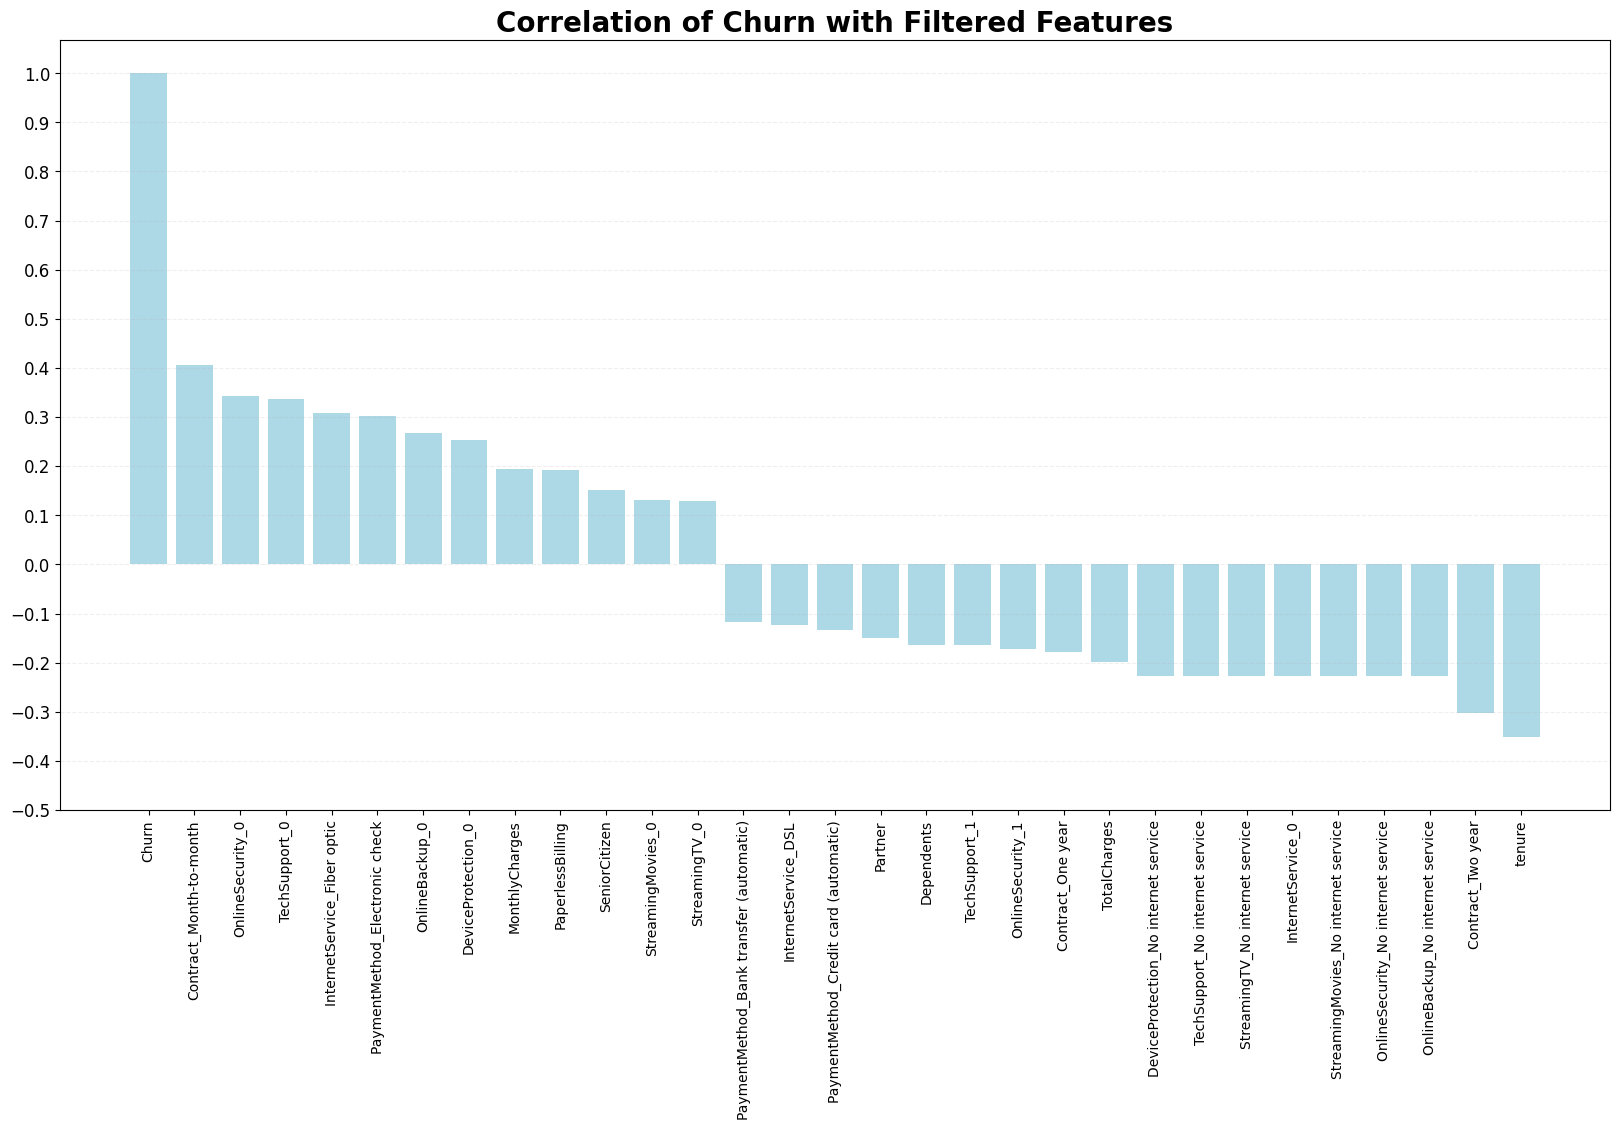

In [18]:

filtered_corr_values = filtered_data.corr()['Churn'].sort_values(ascending=False)

# Grafik oluşturma
plt.figure(figsize=(20, 10))
plt.title('Correlation of Churn with Filtered Features', fontsize=20, weight='bold')

# Çubuk grafiği çiz (tüm sütunlar 0.1'den büyük olduğu için mavi renk)
plt.bar(filtered_corr_values.index, filtered_corr_values, color='lightblue')

# Grid çizgileri ekleme (0.1, 0.2, 0.3, ...)
plt.yticks([i / 10 for i in range(-5, 11)], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.2)

# X label'ları döndür (okunaklı olması için)
plt.xticks(rotation=90)

# Grafik göster
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------
# -*- Handling Class Imbalance Problem -*-

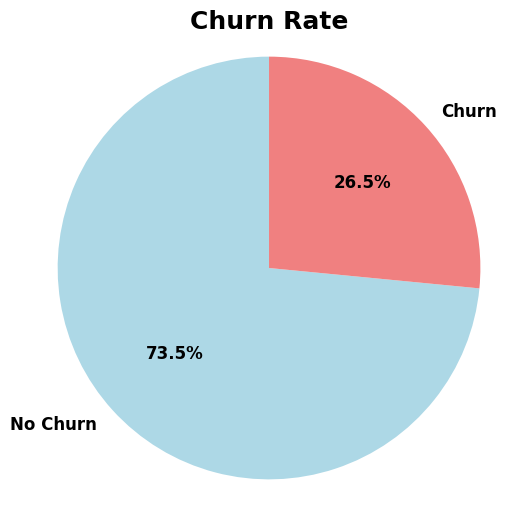

In [19]:
churn_percentage = (filtered_data['Churn'].value_counts() * 100.0) / len(filtered_data)

colors = ['lightblue', 'lightcoral'] if churn_percentage.index[0] == 0 else ['red', 'blue']

# Pie chart çizimi
plt.figure(figsize=(6, 6))
plt.pie(churn_percentage, labels=['No Churn', 'Churn'], autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})

# Başlık ekle
plt.title('Churn Rate', fontsize=18, weight='bold')

# Daire şeklinde düzgün görünmesini sağla
plt.axis('equal')

# Grafiği göster
plt.show()